# Fourierovská komprese obrazu
* Pokuď nemáš páru, co je to Fourierova transformace (FT), mrkni na INTRO sešit (odkaz zde nebo v popisku videa).
* Idea komprese je jednoduchá, zaprvé proveďme FT obrázku.
* Poté ořízneme okraje tohoto takzvaného FT spektra a nakonec provedem zpětnou FT (nazývanou inverzní tedy iFT).
* Porovnáme výsledek s originálem a vyhodnotíme kompresní poměr.

## Obrázek, který jsem vybral je portrét slovutného Josepha Fouriera

In [1]:
# import modulů
from PIL import Image,ImageOps
import scipy.fftpack as fp

import numpy as np
import matplotlib.pyplot as plt

### Vykreslení krásy Josepha Fouriera
portrét z [wikipedie](https://en.wikipedia.org/wiki/Joseph_Fourier#/media/File:Fourier2_-_restoration1.jpg), převedený do černobílé.

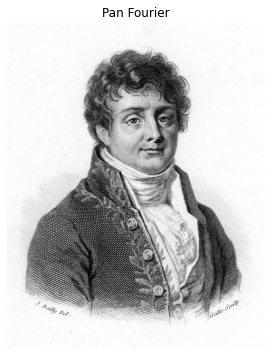

In [2]:
# načtení obrázku
img = Image.open('../../resource/fig/fourier_greyscale.png').convert('L')

# vykreslení
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Pan Fourier')
plt.show()

### Aplikujeme FT
* `fft.fft2` je dvou-dimensionální FT, pro 1D existuje `fft.fft`
* Pro hezčí zobrazení, `fft.fftshift` se postará o symetrii FT a posune nám frekvenci 0 doprostřed obrázku.

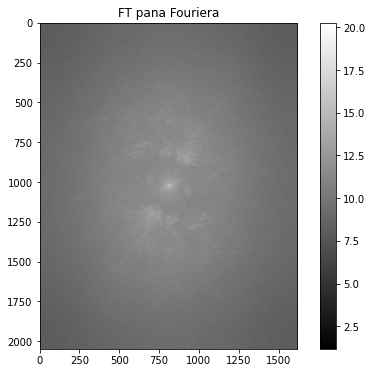

In [4]:
img_ft = np.fft.fftshift(np.fft.fft2(img))

plt.figure(figsize=(8, 6))
plt.imshow(np.log(abs(img_ft)), cmap='gray')
plt.colorbar()
plt.title('FT pana Fouriera')
plt.show()

* Bílé oblasti ukazují frekvence s vyšší amplitudou (nesou více informace).
* Středový bod je frekvence=0, dále od středu se vyskytují body s vzšší frekvencí, což znamená větší detaily obrázku.
* Vyšší frekvence jsou méně jasné, proto je ořízneme. Tím se jich zbavíme, ale také zmenšíme velikost obrázku, tedy ho zkomprimujeme.
### Filtrování Sira Josepha
**Tvůj první úkol**

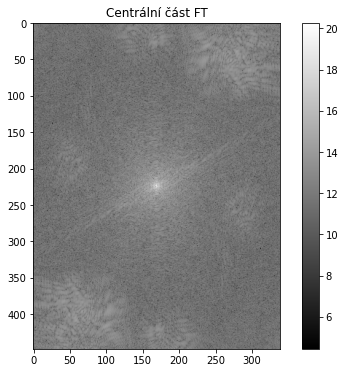

In [5]:
# Obrázek je 2D pole hodnot, najdi si na internetu, jak v pythonu funguje indexování
# abys dokázal následující:
# Oříznout 800 řádků zhore i zdola obrázku.
# Zároveň oříznout 640 sloupců zleva i zprava originálu.
# To bude náš nový FT obrázek
img_ft_maly = 
plt.figure(figsize=(8, 6))
plt.imshow(np.log(abs(img_ft_maly)), cmap='gray')
plt.colorbar()
plt.title('Centrální část FT')
plt.show()

### Teď přejdem zpět, nejprve aplikujeme `ifftshift` funkci (vnitřní) a pak `ifft2` (vnější)

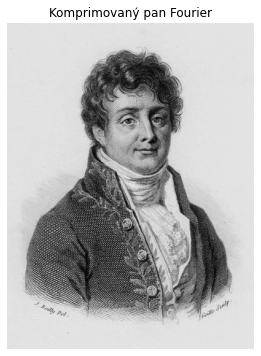

In [6]:
# Napodob vzor z provedené FT výše, tentokrát ale s použitím funkcí ifftshift
# a ifft2, i znamená inverse, tedy zpětná FT, což je přesně to, co potřebujeme.
# POZOR: musíš applikovat funkce v opačném pořadí, abys ses dostala správně zpět.
img_filt = 

plt.figure(figsize=(8, 6))
plt.imshow(abs(img_filt), cmap='gray')
plt.axis('off')
plt.title('Komprimovaný pan Fourier')
plt.show()

In [7]:
print('originální rozměr v pixelech (řádky, sloupce): ', img_ft.shape)
print('filtrovaný rozměr v pixelech (řádky, sloupce): ', img_filt.shape)

# Spočti velikost (počet pixelů) originálu a zmenšeného Fouriéra jako
# součin počtu řádků a sloupců.
# Je mnoho způsobů, jak to učinit, např pomocí funkcí np.shape, np.prod(), len()
# Mrkni na dokumentaci, jak fungují, NB řešení používá np.prod()
velikost_orig = 
velikost_filt = 

originální rozměr v pixelech (řádky, sloupce):  (2048, 1619)
filtrovaný rozměr v pixelech (řádky, sloupce):  (448, 339)


### Kompresní poměr
* zde vypočtený ve formě takzvaného *ušetřeného místa (space saving)*.
* který vyjadřuje kolik procent na disku jsme ušetřili v porovnání s originálem.

In [8]:
# Dokážeš vymyslet správný vzorec použitím proměnných velikost_orig a
# velikost_filt z buňky nahoře?


95.41962631253861

## Stále dobrý Fourier, i po zahození 95% pixelů, ale těch správných. Dobrá práce!

### Otázky:
1. Kam až můžete jít s filtrováním než uvidíte rozmazání obrázku?